# Comparing Types of Normalization

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
df=pd.read_csv('./train.csv')
from tensorflow.keras import datasets, layers, models
import os
from os import listdir
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import datasets, layers, models

In [2]:
from sklearn.model_selection import train_test_split
X=df['image_name'].tolist()
y=df['label'].astype(str).tolist()
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
train=pd.DataFrame(X_train,y_train)
train.reset_index(inplace=True)
train = train.rename(columns = {'index':'label'})
train = train.rename(columns = {0:'image_name'})
print(train)

valid=pd.DataFrame(X_valid,y_valid)
valid.reset_index(inplace=True)
valid = valid.rename(columns = {'index':'label'})
valid = valid.rename(columns = {0:'image_name'})
valid

      label image_name
0         1   9647.jpg
1         3    415.jpg
2         3   3239.jpg
3         4   2229.jpg
4         0  20113.jpg
...     ...        ...
12770     1  10527.jpg
12771     5  19766.jpg
12772     4  20393.jpg
12773     3  14827.jpg
12774     2  21478.jpg

[12775 rows x 2 columns]


,label,image_name
0,5,9126.jpg
1,2,9906.jpg
2,5,4922.jpg
3,1,8162.jpg
4,2,12463.jpg
...,...,...
4254,5,9798.jpg
4255,2,10117.jpg
4256,3,5043.jpg
4257,5,23417.jpg


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(20, 150, 150, 3)
(150, 150, 3)


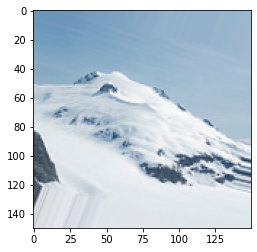

In [3]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255, shear_range=0.1,
                                             zoom_range=0.3,
                                       rotation_range=25,
                                       channel_shift_range=.2,
                                               horizontal_flip=True,
                                      zca_whitening=True)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

# 3 Convo Batch normalized model 

In [3]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\maure\AppData\Local\Temp/ipykernel_5928/3373165837.py", line 20, in <module>
    history = model.fit(train_gen,
NameError: name 'train_gen' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_

TypeError: object of type 'NoneType' has no len()

In [8]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

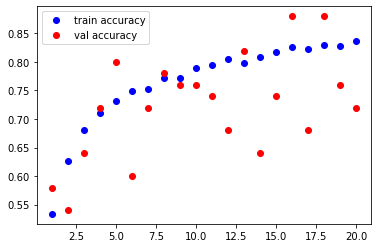

In [9]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

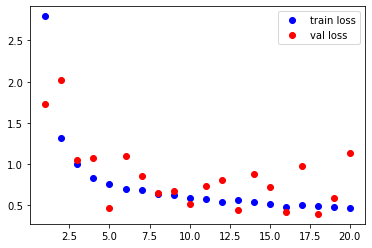

In [10]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

# 3 Convo Layer Normalized

In [10]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 133s 207ms/step - loss: 1.6240 - categorical_accuracy: 0.5244 - val_loss: 1.2537 - val_categorical_accuracy: 0.5800
Epoch 2/20
639/639 [==============================] - 85s 133ms/step - loss: 0.9742 - categorical_accuracy: 0.6425 - val_loss: 0.9098 - val_categorical_accuracy: 0.7000
Epoch 3/20
639/639 [==============================] - 87s 136ms/step - loss: 0.7955 - categorical_accuracy: 0.7097 - val_loss: 0.7787 - val_categorical_accuracy: 0.6800
Epoch 4/20
639/639 [==============================] - 87s 136ms/step - loss: 0.7320 - categorical_accuracy: 0.7335 - val_loss: 0.7903 - val_categorical_accuracy: 0.7800
Epoch 5/20
639/639 [==============================] - 86s 135ms/step - loss: 0.6805 - categorical_accuracy: 0.7457 - val_loss: 1.0263 - val_categorical_accuracy: 0.6400
Epoch 6/20
639/639 [==============================] - 85s 133ms/step - loss: 0.6496 - categorical_accuracy: 0.7655 - val_loss: 0.7022 - val_categorical_ac

In [11]:
model.save('saved_model/model3ConvoLayerNorm')

INFO:tensorflow:Assets written to: saved_model/model3ConvoLayerNorm\assets


INFO:tensorflow:Assets written to: saved_model/model3ConvoLayerNorm\assets


In [12]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

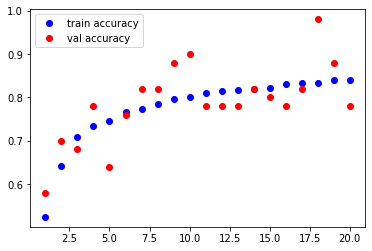

In [13]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

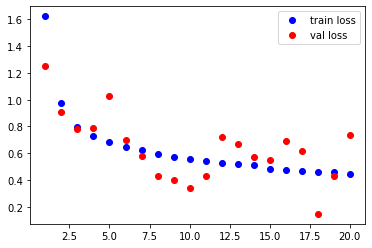

In [14]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

This model performed quite well, it seems to so far be the best model I have tested. Now lets try a 4 convolution Model to see how it performs

# 4 Convo Layer Normalized

In [17]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
639/639 [==============================] - 84s 129ms/step - loss: 1.4380 - categorical_accuracy: 0.4825 - val_loss: 0.9948 - val_categorical_accuracy: 0.6200
Epoch 2/20
639/639 [==============================] - 83s 130ms/step - loss: 0.9858 - categorical_accuracy: 0.6188 - val_loss: 0.8599 - val_categorical_accuracy: 0.6400
Epoch 3/20
639/639 [==============================] - 83s 129ms/step - loss: 0.8300 - categorical_accuracy: 0.6842 - val_loss: 0.6621 - val_categorical_accuracy: 0.8000
Epoch 4/20
639/639 [==============================] - 82s 128ms/step - loss: 0.7344 - categorical_accuracy: 0.7312 - val_loss: 0.8299 - val_categorical_accuracy: 0.7000
Epoch 5/20
639/639 [==============================] - 82s 129ms/step - loss: 0.6790 - categorical_accuracy: 0.7533 - val_loss: 0.5507 - val_categorical_accuracy: 0.8200
Epoch 6/20
639/639 [==============================] - 83s 130ms/step - loss: 0.6235 - categorical_accuracy: 0.7776 - val_loss: 0.4789 - val_categorical_acc

In [18]:
model.save('saved_model/model4ConvoLayerNorm')

INFO:tensorflow:Assets written to: saved_model/model4ConvoLayerNorm\assets


INFO:tensorflow:Assets written to: saved_model/model4ConvoLayerNorm\assets


In [19]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

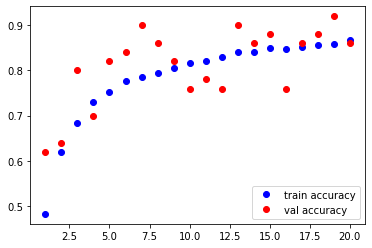

In [20]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

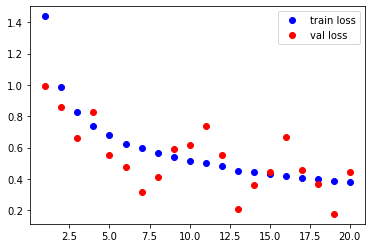

In [21]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

Lets try 10 more epochs

In [25]:
history = model.fit(train_gen,
                     epochs=30,
                    initial_epoch=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 21/30
639/639 [==============================] - 122s 190ms/step - loss: 0.3735 - categorical_accuracy: 0.8679 - val_loss: 0.3042 - val_categorical_accuracy: 0.9000
Epoch 22/30
639/639 [==============================] - 84s 131ms/step - loss: 0.3682 - categorical_accuracy: 0.8688 - val_loss: 0.2453 - val_categorical_accuracy: 0.8800
Epoch 23/30
639/639 [==============================] - 85s 133ms/step - loss: 0.3546 - categorical_accuracy: 0.8736 - val_loss: 0.5127 - val_categorical_accuracy: 0.8800
Epoch 24/30
639/639 [==============================] - 84s 132ms/step - loss: 0.3495 - categorical_accuracy: 0.8751 - val_loss: 0.3928 - val_categorical_accuracy: 0.9000
Epoch 25/30
639/639 [==============================] - 86s 134ms/step - loss: 0.3460 - categorical_accuracy: 0.8738 - val_loss: 0.5164 - val_categorical_accuracy: 0.8200
Epoch 26/30
639/639 [==============================] - 85s 133ms/step - loss: 0.3417 - categorical_accuracy: 0.8755 - val_loss: 0.3731 - val_categori

It does not seem to benifiting greatly from more epochs lets try a 5 convolution model

# 5 Convo Layer Normalized

In [28]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(512, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=30,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/30
639/639 [==============================] - 86s 131ms/step - loss: 1.3498 - categorical_accuracy: 0.4675 - val_loss: 1.4317 - val_categorical_accuracy: 0.4000
Epoch 2/30
639/639 [==============================] - 84s 131ms/step - loss: 0.9454 - categorical_accuracy: 0.6355 - val_loss: 0.7890 - val_categorical_accuracy: 0.6600
Epoch 3/30
639/639 [==============================] - 83s 130ms/step - loss: 0.8009 - categorical_accuracy: 0.7038 - val_loss: 0.6957 - val_categorical_accuracy: 0.7000
Epoch 4/30
639/639 [==============================] - 83s 129ms/step - loss: 0.7202 - categorical_accuracy: 0.7411 - val_loss: 0.7030 - val_categorical_accuracy: 0.7800
Epoch 5/30
639/639 [==============================] - 83s 130ms/step - loss: 0.6731 - categorical_accuracy: 0.7519 - val_loss: 0.5038 - val_categorical_accuracy: 0.9000
Epoch 6/30
639/639 [==============================] - 90s 141ms/step - loss: 0.6197 - categorical_accuracy: 0.7756 - val_loss: 0.5505 - val_categorical_acc

lets try only 2 convulutions

# 2 Convo Layer Normalized

In [5]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 105s 163ms/step - loss: 2.9604 - categorical_accuracy: 0.4997 - val_loss: 0.9180 - val_categorical_accuracy: 0.7000
Epoch 2/20
639/639 [==============================] - 91s 143ms/step - loss: 1.1821 - categorical_accuracy: 0.6094 - val_loss: 0.7842 - val_categorical_accuracy: 0.7000
Epoch 3/20
639/639 [==============================] - 92s 144ms/step - loss: 0.8690 - categorical_accuracy: 0.6768 - val_loss: 0.9290 - val_categorical_accuracy: 0.6800
Epoch 4/20
639/639 [==============================] - 91s 141ms/step - loss: 0.7662 - categorical_accuracy: 0.7177 - val_loss: 1.0817 - val_categorical_accuracy: 0.7000
Epoch 5/20
639/639 [==============================] - 92s 143ms/step - loss: 0.7517 - categorical_accuracy: 0.7256 - val_loss: 0.5802 - val_categorical_accuracy: 0.8000
Epoch 6/20
639/639 [==============================] - 86s 135ms/step - loss: 0.7271 - categorical_accuracy: 0.7321 - val_loss: 0.5963 - val_categorical_ac

 lets retry batch Normilization with a bigger batch size.

# 3 Convolution Bigger Batch size

In [9]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                    batch_size=250,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 94s 145ms/step - loss: 3.9325 - categorical_accuracy: 0.5346 - val_loss: 3.4299 - val_categorical_accuracy: 0.5200
Epoch 2/20
639/639 [==============================] - 92s 144ms/step - loss: 2.4917 - categorical_accuracy: 0.6066 - val_loss: 1.1827 - val_categorical_accuracy: 0.7000
Epoch 3/20
639/639 [==============================] - 87s 137ms/step - loss: 1.2171 - categorical_accuracy: 0.6725 - val_loss: 1.5724 - val_categorical_accuracy: 0.5000
Epoch 4/20
639/639 [==============================] - 82s 128ms/step - loss: 0.8660 - categorical_accuracy: 0.7155 - val_loss: 1.4447 - val_categorical_accuracy: 0.7000
Epoch 5/20
639/639 [==============================] - 82s 128ms/step - loss: 0.7335 - categorical_accuracy: 0.7468 - val_loss: 2.3443 - val_categorical_accuracy: 0.5400
Epoch 6/20
639/639 [==============================] - 82s 128ms/step - loss: 0.7052 - categorical_accuracy: 0.7555 - val_loss: 1.4869 - val_categorical_acc

Lets try a 4 convolutuon layer normalized model with different datagen Parameters to see if the model can be imporoved further.

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


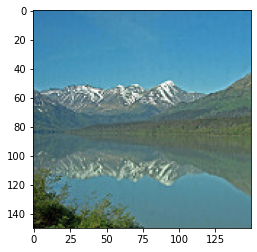

In [6]:
datagen_train=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

# 4 Convolution model with no DataGen modification

In [5]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 75s 113ms/step - loss: 1.4220 - categorical_accuracy: 0.4929 - val_loss: 1.0536 - val_categorical_accuracy: 0.5600
Epoch 2/20
639/639 [==============================] - 48s 75ms/step - loss: 0.8484 - categorical_accuracy: 0.6773 - val_loss: 1.1824 - val_categorical_accuracy: 0.5000
Epoch 3/20
639/639 [==============================] - 48s 75ms/step - loss: 0.6753 - categorical_accuracy: 0.7512 - val_loss: 0.4350 - val_categorical_accuracy: 0.8200
Epoch 4/20
639/639 [==============================] - 48s 75ms/step - loss: 0.5859 - categorical_accuracy: 0.7858 - val_loss: 0.5497 - val_categorical_accuracy: 0.7800
Epoch 5/20
639/639 [==============================] - 48s 75ms/step - loss: 0.5269 - categorical_accuracy: 0.8088 - val_loss: 0.6593 - val_categorical_accuracy: 0.7000
Epoch 6/20
639/639 [==============================] - 48s 75ms/step - loss: 0.4803 - categorical_accuracy: 0.8265 - val_loss: 0.3220 - val_categorical_accuracy

In [7]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

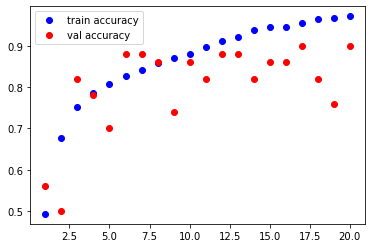

In [8]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

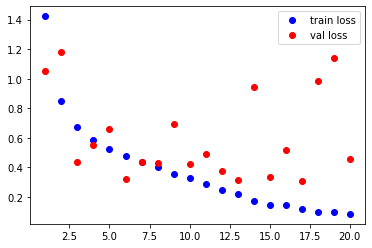

In [9]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

With no special parameters the model performs ok, but lets try a model with horizontal flip

In [11]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

Found 12775 validated image filenames belonging to 6 classes.


# 4 Convo with horizontal flip 

In [12]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 49s 75ms/step - loss: 1.4268 - categorical_accuracy: 0.4974 - val_loss: 0.8377 - val_categorical_accuracy: 0.7200
Epoch 2/20
639/639 [==============================] - 47s 73ms/step - loss: 0.8316 - categorical_accuracy: 0.6828 - val_loss: 0.7830 - val_categorical_accuracy: 0.6800
Epoch 3/20
639/639 [==============================] - 46s 72ms/step - loss: 0.6761 - categorical_accuracy: 0.7497 - val_loss: 0.4288 - val_categorical_accuracy: 0.8200
Epoch 4/20
639/639 [==============================] - 46s 72ms/step - loss: 0.6130 - categorical_accuracy: 0.7789 - val_loss: 0.9042 - val_categorical_accuracy: 0.7200
Epoch 5/20
639/639 [==============================] - 46s 72ms/step - loss: 0.5468 - categorical_accuracy: 0.8039 - val_loss: 0.4048 - val_categorical_accuracy: 0.8800
Epoch 6/20
639/639 [==============================] - 54s 85ms/step - loss: 0.5055 - categorical_accuracy: 0.8175 - val_loss: 0.4653 - val_categorical_accuracy:

In [14]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

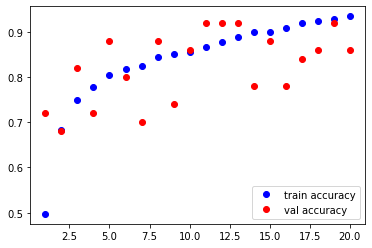

In [15]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

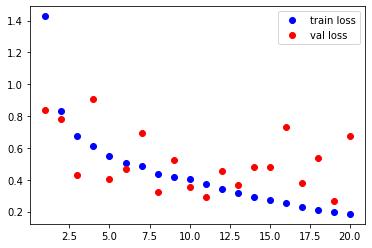

In [16]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

Horizontal flip seems to help slighly, lets try vertical flip

In [17]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,vertical_flip=True)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

Found 12775 validated image filenames belonging to 6 classes.


# 4 Convo with vertical Flip added

In [18]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 52s 78ms/step - loss: 1.5014 - categorical_accuracy: 0.4414 - val_loss: 0.9384 - val_categorical_accuracy: 0.6600
Epoch 2/20
639/639 [==============================] - 66s 103ms/step - loss: 0.9763 - categorical_accuracy: 0.6153 - val_loss: 0.7085 - val_categorical_accuracy: 0.7600
Epoch 3/20
639/639 [==============================] - 66s 103ms/step - loss: 0.7930 - categorical_accuracy: 0.6932 - val_loss: 0.7448 - val_categorical_accuracy: 0.6800
Epoch 4/20
639/639 [==============================] - 63s 98ms/step - loss: 0.6907 - categorical_accuracy: 0.7410 - val_loss: 0.8032 - val_categorical_accuracy: 0.5800
Epoch 5/20
639/639 [==============================] - 47s 74ms/step - loss: 0.6504 - categorical_accuracy: 0.7508 - val_loss: 0.4670 - val_categorical_accuracy: 0.8400
Epoch 6/20
639/639 [==============================] - 47s 74ms/step - loss: 0.5984 - categorical_accuracy: 0.7771 - val_loss: 0.3223 - val_categorical_accurac